In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import dtale
import matplotlib.pyplot as plt

In [105]:
df_berry = pd.read_csv('berry_data_cleaned.csv')
df_weather = pd.read_csv('weather_data.csv')
df_forest = pd.read_csv('forest_inventory_data.csv')

In [106]:
df_berry_weather = pd.merge(df_berry, df_weather, on="latlon", how="left")

In [107]:
df_everything = pd.merge(df_berry_weather, df_forest, on="xy", how="left")

# northern parts/coordinates is missing in the forest inventory
# let's use the nearest northern measurement point for 
# forest inventory data
helper_row = df_everything.iloc[263]
broken_rows = df_everything[df_everything.isna().any(axis=1)]

nan_cols = [i for i in broken_rows.columns if broken_rows[i].isnull().any()]

for col in nan_cols:
    for index, row in broken_rows.iterrows():
        df_everything.loc[index, col] = helper_row[col]

In [108]:
df_berry_weather.drop(['week_number', 'xy', 'latlon', 'feelslikemax', 
                       'feelslikemin', 'feelslike', 'visibility', 'lat_x', 'lon_y' , 'solarradiation', 'solarenergy', 'uvindex', 
                       'year-month-day_y', 'berry_y', 'observation_date', 'year-month-day_x', 'month', 'day'], axis=1, inplace=True)
df_berry_weather.rename(columns={'berry_x':'berry_type'}, inplace=True)

In [125]:
dtale.show(df_everything).open_browser()

In the beginning of the research I would like to formulate main questions to which we'll have to figure out the answers:
1. What factors can affect distibution and ripening process of different berry types across the Finland

    1.1. Weather

    1.2. Environment

    1.3. Human impact




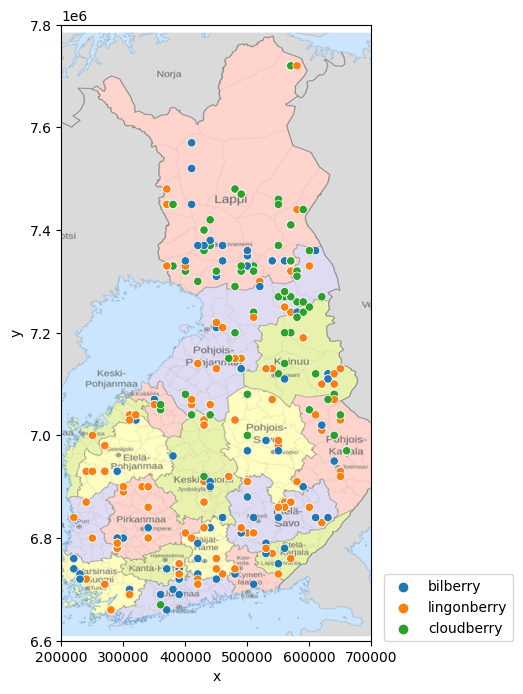

In [111]:
img = plt.imread('finlandmapregions.png')

fig, ax = plt.subplots(figsize=(4,8))
sns.scatterplot(x='x', y='y', data=df_berry_weather, hue='berry_type')
plt.xlim(200000, 700000)
plt.ylim(6600000, 7800000)
plt.legend(loc=(1.04, 0))
ax.imshow(img, extent=[155000, 760000, 6590000, 7790000], aspect='auto', alpha=1.0)
plt.show()

On the plotted map we can see distribution of the berry types across Finland. Based on this visual information we can make few suggestions:
1. Cloudberry likes to be on the north
2. Cloudberry spots looks more grouped and closer to each other then other berries.
3. Lingonberry  prefers southern regions
4. Bilberry can be spotted at the North regions, as well as South, but not in the middle.
5. Disribution between East and West looks balanced.

Let's take a closer look on berries.


<AxesSubplot: xlabel='year', ylabel='monthday'>

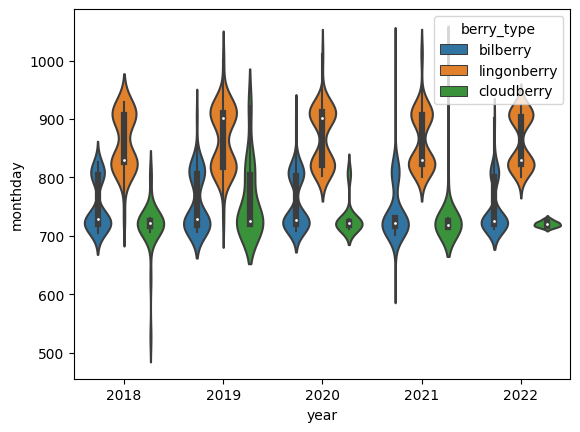

In [131]:
sns.violinplot(x='year', y='monthday', data=df_berry_weather, scale='width', hue='berry_type')

On the plot we can see time periods of observations of the ripe berries grouped by years. 

We can clearly see that usually bilberry and cloudberry are tending to get ripe at almost same time of year, in the the end of June - beginning of July. 

Lingonberry is later berry. It starts getting ripe in later July - beginning of August.

There is a pair of interesting years:
    2018 - First ripe cloudberries were spotted already in May, which is almost 1 month earlier than usual
    2021 - Bilberry came a little bit earlier and berry season continued way longer than usual

Let's compare this plot to the historical temperature data.


<AxesSubplot: xlabel='year', ylabel='temp'>

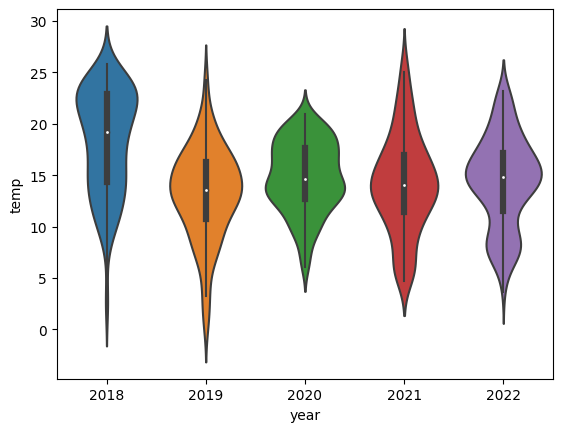

In [182]:
sns.violinplot(x='year', y='temp', data=df_berry_weather)

As we can see, 2018 was way more warmer than other years. On the next plot we can also in details see, that starting from July, temperature was really hot. 

<AxesSubplot: xlabel='monthday', ylabel='temp'>

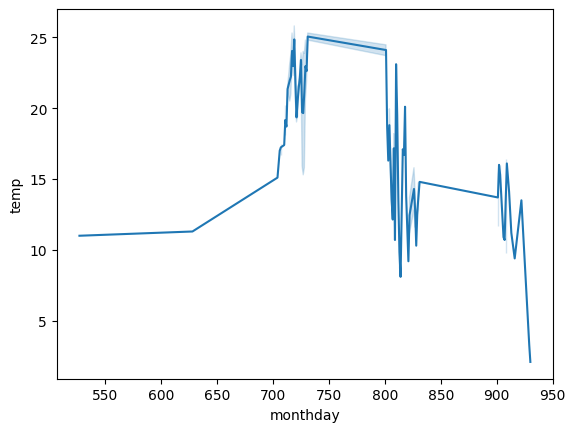

In [181]:
# Temperature of year 2018 
sns.lineplot(x='monthday', y='temp', data=df_berry_weather[df_berry_weather['year'] == 2018])